In [110]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.ticker as ticker
import ipywidgets as widgets


In [111]:
school_df_path = Path(
    r"C:\Users\dontb\01\001\Repos\Schools-Analysis\Resources\public_school_data.csv"
)
data = pd.read_csv(school_df_path)

In [124]:
def race_plot_prep(
    school_type, state, value_vars=["AM", "AS", "BL", "HI", "HP", "TR", "WH"]
):
    school_type_filtered = all_schools.loc[
        all_schools["School Type"].isin([school_type])
    ]
    state_filtered = school_type_filtered.loc[
        school_type_filtered["State"].isin([state])
    ]
    race_melted = pd.melt(state_filtered, value_vars=value_vars)
    race_totals = race_melted.groupby("variable")["value"].sum()
    race_totals_sorted = race_totals.sort_values(ascending=True)
    return race_totals_sorted


def race_plotter(race_totals, state):
    plt.figure(figsize=(17, 9))
    colors = [
        "#3C1853",
        "#3C1F67",
        "#37267B",
        "#2E308E",
        "#364EA1",
        "#4188A8",
        "#4DAFA0",
        "#58B67C",
        "#6CBD64",
    ]
    ax = sns.barplot(x=race_totals.index, y=race_totals.values, palette=colors)
    plt.xlabel("\nRace", fontsize=14)
    plt.ylabel("Number of Students\n", fontsize=14)
    plt.title(f"Number of Students by Race [{state}]\n", fontsize=18)
    y_labels = ax.get_yticks().tolist()
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"{int(x):,}"))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    for i in ax.containers:
        ax.bar_label(i, fmt="%d")
    plt.show()


def plot_bot():
    school_type_input = input(
        "Enter School Type [Regular, Special Education, Alternative Education, Career and Technical]: "
    )
    school_type_input = school_type_input.title().strip("'").strip('"')
    state_input = input("Enter State: ")
    state_input = state_input.upper().strip("'").strip('"')
    if (
        school_type_input in all_schools["School Type"].unique()
        and state_input in all_schools["State"].unique()
    ):
        race_plotter(race_plot_prep(school_type_input, state_input), state_input)
    else:
        print("School Type and/or State not found")

In [113]:
# clean all_schools data
all_schools_nulls = data
columns_to_replace = ["AM", "AS", "BL", "HP", "HI", "TR", "WH"]
all_schools = all_schools_nulls.copy()
all_schools.loc[:, columns_to_replace] = all_schools.loc[:, columns_to_replace].fillna(
    0
)
all_schools = all_schools.dropna()

all_schools = all_schools.drop(["SCHOOL_LEVEL", "STUTERATIO"], axis=1)
name_mapping = {
    "Regular school": "Regular",
    "Special education school": "Special Education",
    "Alternative Education School": "Alternative Education",
    "Career and Technical School": "Career and Technical",
}
all_schools["SCHOOL_TYPE_TEXT"] = all_schools["SCHOOL_TYPE_TEXT"].map(name_mapping)
all_schools.rename(
    columns={
        "UNIQUE_ID": "ID",
        "LSTATE": "State",
        "SCHOOL_TYPE_TEXT": "School Type",
        "TOTAL": "Total Students",
        "FTE": "Total Teachers",
    },
    inplace=True,
)

Text(0.5, 0.98, 'Student-Teacher Ratio Trends in the US\n')

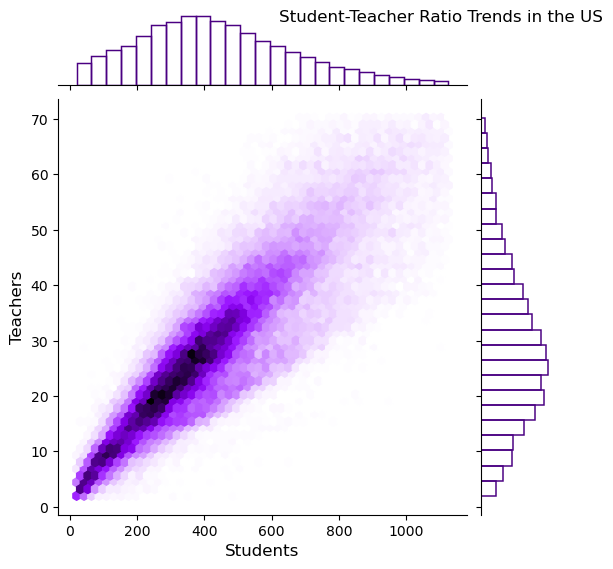

In [114]:
# Your code below
regular_schools = all_schools.loc[all_schools["School Type"] == "Regular"]

qlow_total = regular_schools["Total Students"].quantile(0.01)
qhigh_total = regular_schools["Total Students"].quantile(0.925)
total_filtered = regular_schools[
    (regular_schools["Total Students"] >= qlow_total)
    & (regular_schools["Total Students"] <= qhigh_total)
]
qlow_fte = regular_schools["Total Teachers"].quantile(0.01)
qhigh_fte = regular_schools["Total Teachers"].quantile(0.925)
fte_filtered = regular_schools[
    (regular_schools["Total Teachers"] >= qlow_fte)
    & (regular_schools["Total Teachers"] <= qhigh_fte)
]

sns.jointplot(
    x=total_filtered["Total Students"],
    y=fte_filtered["Total Teachers"],
    data=regular_schools,
    color=(0.29, 0, 0.51, 1),
    kind="hex",
    marginal_kws=dict(bins=25, fill=False),
    height=5.75,
    ratio=5,
)

plt.xlabel("Students", fontsize=12)
plt.ylabel("Teachers", fontsize=12)
plt.suptitle("Student-Teacher Ratio Trends in the US\n", ha="left", fontsize=12)

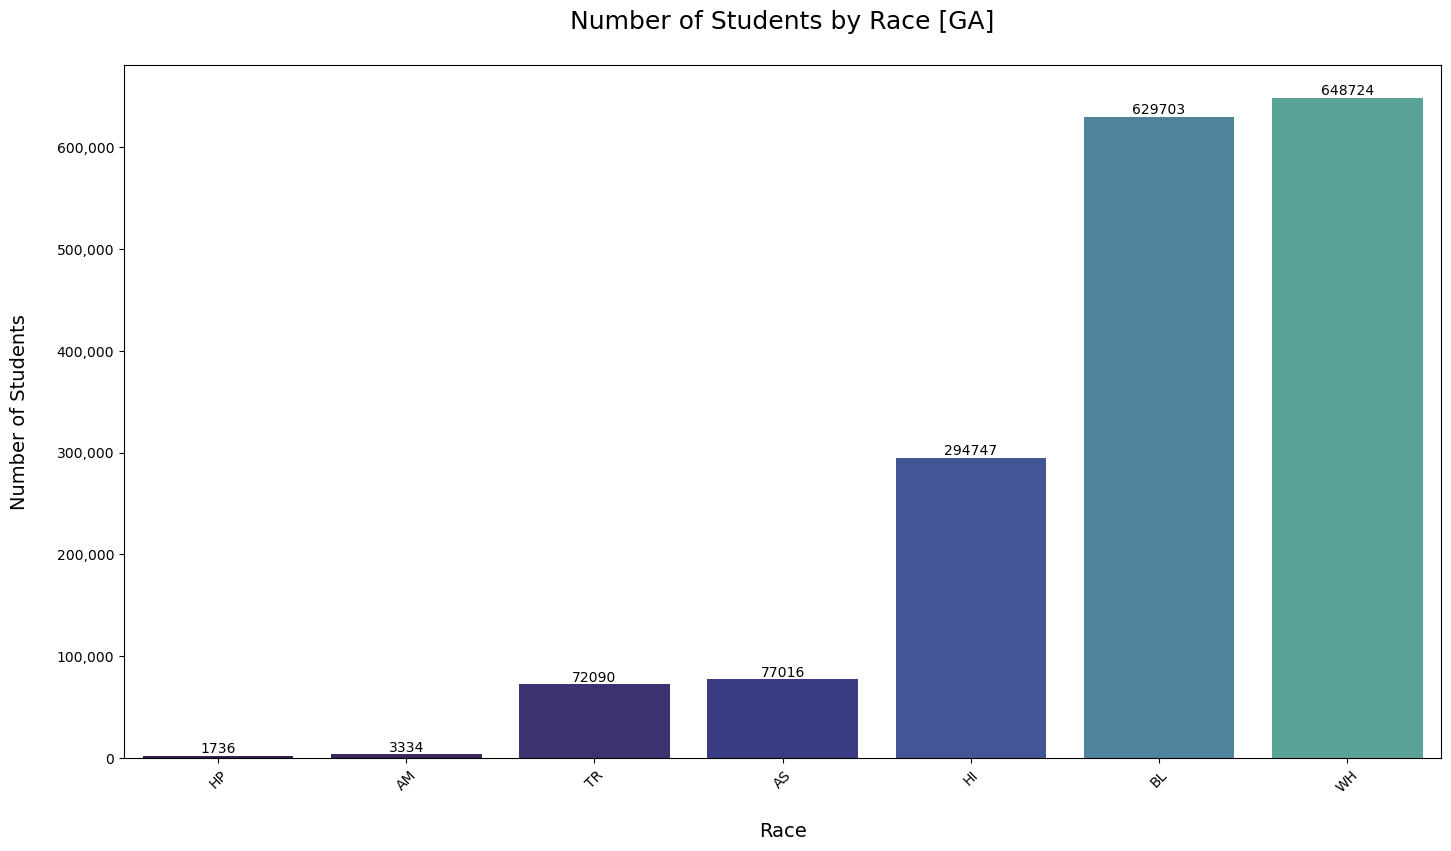

In [125]:
# Run the function to generate a boxplot (Number of Students by Race and State)

plot_bot()